In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, slime
from importlib import reload
from copy import deepcopy

## slimey

In [5]:
reload(slime);

In [8]:
# Set-up
shape = (15, 15)

food = np.zeros(shape)
food[0, 3] = 1
food[14, 7] = 1
# food[5, 14] = 20
# food[8, 9] = 20
# food[4, 7] = 20
# food[3, 0] = 200

petri = slime.PetriDish(shape, food)
agent = slime.Agent(shape, home=np.array((14, 14)), forward_bias=0.0, p_strength=0, view_distance=5)

# Run
petri.grow_slime([deepcopy(agent) for x in range(5)])
# petri.grow_slime([agent])

pickig up food
pickig up food
Finished after 86
There is no more food: 0.0
All the agents are home: True


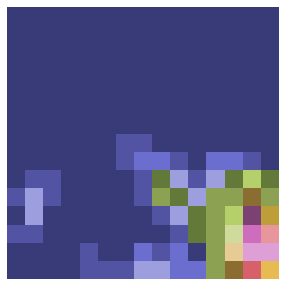

In [9]:
slime.draw(petri.slime);

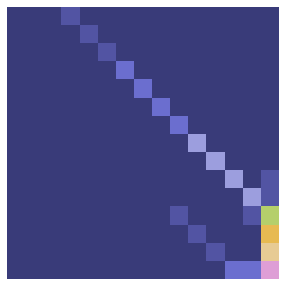

In [10]:
slime.draw(petri.pheromones);

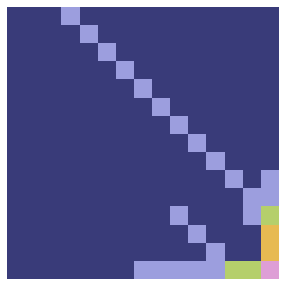

In [11]:
slime.draw(petri.trails);

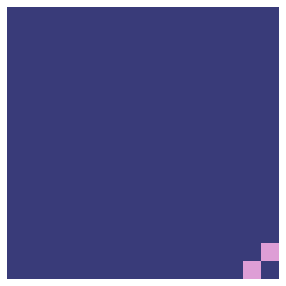

In [12]:
anim = petri.animate();

In [13]:
anim

## test 2

In [ ]:
# Set-up
shape = (35, 85)

food = np.zeros(shape)
food[0, 35] = 50
food[14, 0] = 50
food[34, 14] = 50
food[34, 75] = 50
# food[4, 7] = 20
# food[3, 0] = 200

petri = slime.PetriDish(shape, food)
agent = slime.Agent(shape, home=np.array((17, 42)), forward_bias=15.0, p_strength=50)

# Run
petri.grow_slime([deepcopy(agent) for x in range(250)])

In [ ]:
slime.draw(petri.slime);

In [ ]:
slime.draw(petri.pheromones);

In [ ]:
slime.draw(petri.trails);

In [ ]:
agent.direction * np.array([3, 3])

In [ ]:
np.array([0, 1]) * np.array([3, 3])

## field of view

In [ ]:
possible_rook_directions = np.array([[-1, 0], [1, 0], [0, -1], [0, 1]])
possible_queen_directions = np.array([[-1, -1], [1, 1], [1, -1], [-1, 1]])

In [ ]:
np.where(possible_rook_directions == 0, -1, possible_directions * 3)

In [ ]:
possible_queen_directions * 3

In [ ]:
np.array([-1, -1]) in possible_rook_directions

In [ ]:
slime.poss

In [ ]:
def get_field_of_view(direction, loc, petri, size=3):    
    if direction.min() != 0:
        p1 = direction * size
        xs = np.sort([p1[0], direction[0]]) + loc
        ys = np.sort(direction) + loc
    else:
        p1 = np.where(direction == 0, -1, direction * (size - 1)) + loc

    return xs, ys

In [ ]:
get_field_of_view(np.array([-1, -1]), np.array([0, 0]), np.ones((10, 10)))

In [ ]:
np.sort([1, -1]) - np.array([5, 5])

In [ ]:
get_field_of_view(np.array([0, 1]), np.array([0, 0]), np.ones((10, 10)))

In [ ]:
if -1, 0 and 5, 5: we want 2, 5 and 4, 7
if 1, 0 and 5, 5: we want 2, 5 and 4, 7

In [ ]:
sh10 = np.ones((10, 10))

In [ ]:
sh10[2:5, 4:7]

## extract images

In [ ]:
from scipy.ndimage.filters import gaussian_filter

In [ ]:
slime.draw(gaussian_filter(petri.slime, 0.5));

In [ ]:
import skimage.feature

In [ ]:
im = petri.trails

edges = skimage.feature.canny(image=im, sigma=5)
slime.draw(edges * 1)

plt.show();

In [ ]:
slime.draw((petri.trails > 15) * 1)

In [ ]:
from skimage.measure import approximate_polygon, find_contours

In [ ]:
slime.draw(petri.trails > 5);

In [ ]:
plt.plot(find_contours(petri.trails)[0])

In [ ]:
from shapely.geometry import Polygon, LineString

In [ ]:
polygons = [approximate_polygon(contour, tolerance=150) for contour in find_contours(petri.trails > 5, 0)]

In [ ]:
contours = find_contours(petri.trails, 100, fully_connected='high')

In [ ]:
len(contours)

In [ ]:
c = contours[0]
print(c)
LineString(c)

In [ ]:


img = cv2.imread('loadtest.png', 0)
contours = find_contours(img, 0)

result_contour = np.zeros(img.shape + (3, ), np.uint8)
result_polygon1 = np.zeros(img.shape + (3, ), np.uint8)
result_polygon2 = np.zeros(img.shape + (3, ), np.uint8)

for contour in contours:
    print('Contour shape:', contour.shape)

    # reduce the number of lines by approximating polygons
    polygon1 = approximate_polygon(contour, tolerance=2.5)
    print('Polygon 1 shape:', polygon1.shape)

    # increase tolerance to further reduce number of lines
    polygon2 = approximate_polygon(contour, tolerance=15)
    print('Polygon 2 shape:', polygon2.shape)

    contour = contour.astype(np.int).tolist()
    polygon1 = polygon1.astype(np.int).tolist()
    polygon2 = polygon2.astype(np.int).tolist()

    # draw contour lines
    for idx, coords in enumerate(contour[:-1]):
        y1, x1, y2, x2 = coords + contour[idx + 1]
        result_contour = cv2.line(result_contour, (x1, y1), (x2, y2),
                                  (0, 255, 0), 1)
    # draw polygon 1 lines
    for idx, coords in enumerate(polygon1[:-1]):
        y1, x1, y2, x2 = coords + polygon1[idx + 1]
        result_polygon1 = cv2.line(result_polygon1, (x1, y1), (x2, y2),
                                   (0, 255, 0), 1)
    # draw polygon 2 lines
    for idx, coords in enumerate(polygon2[:-1]):
        y1, x1, y2, x2 = coords + polygon2[idx + 1]
        result_polygon2 = cv2.line(result_polygon2, (x1, y1), (x2, y2),
                                   (0, 255, 0), 1)

cv2.imwrite('contour_lines.png', result_contour)

In [ ]:
len(polygons)

In [ ]:
LineString(polygons[0])

In [ ]:
cv2.imwrite('contour_lines.png', result_contour)

## extract line

In [ ]:
import drawSvg as draw, numpy as np
from svg.path import parse_path

In [ ]:
s1 = 'M11.32,2.86H.86a3.6,3.6,0,0,1,.25,1.37C.86,6.22-.08,6.76,0,8.36c.18,3.57,4,3.71,6.32,5.18h0c2.26-1.56,6.06-1.84,6.1-5.41,0-1.6-.94-2.11-1.27-4.09A2.82,2.82,0,0,1,11.32,2.86Z'
s2 = 'M11.85,1.46,10.27.27A3.61,3.61,0,0,1,6.06,0a3.61,3.61,0,0,1-4.2.43L.33,1.68A9.82,9.82,0,0,1,.86,2.86H11.32A9.49,9.49,0,0,1,11.85,1.46Z'
s3 = 'M15.78,10.68H26.24A3.22,3.22,0,0,1,26,9.31c.25-2,1.18-2.53,1.1-4.13-.18-3.56-4-3.7-6.32-5.18h0c-2.26,1.57-6.07,1.85-6.1,5.42,0,1.6.94,2.1,1.27,4.08A3,3,0,0,1,15.78,10.68Z'
s4 = 'M15.25,12.08l1.57,1.19a3.63,3.63,0,0,1,4.22.27,3.63,3.63,0,0,1,4.2-.43l1.53-1.24a9.55,9.55,0,0,1-.53-1.19H15.78A9,9,0,0,1,15.25,12.08Z'

In [ ]:
def rand_spanning_line(w, h, up=True):
    if up:
        rand_width = np.random.randint(w)
        return up, [rand_width, 0, rand_width, h]
    else:
        rand_height = np.random.randint(h)
        return up, [0, rand_height, w, rand_height]
    
def get_path_from_d(d, x_inc=0, y_inc=0, s=1, **kwargs):
    p = draw.Path(**kwargs)
    
    splits = [x for x in enumerate(d) if x[1] in 'ACLMQSTVZ']
    
    for x in range(1, len(splits)):
        i1, v1 = splits[x - 1]
        i2, v2 = splits[x]
        
        add_to_path(p, d, i1, v1, i2, x_inc, y_inc, s)
        
        if v2 == 'Z': p.Z()
            
    return p
            
def add_to_path(p, d, i1, v1, i2, x_inc, y_inc, s):
    pts = [v.split(',') for v in d[i1 + 2 : i2 - 1].split(' ')]
    pts = [float(pt) for sl in pts for pt in sl]
    if v1 == 'M':
        assert len(pts) == 2
        x, y = pts
        p.M(x * s + x_inc, y * s + y_inc)
    if v1 == 'C':
        assert len(pts) == 6
        cx1, cy1, cx2, cy2, ex, ey = pts
        p.C(cx1 * s + x_inc, cy1 * s + y_inc, cx2 * s + x_inc, cy2 * s + y_inc, ex * s + x_inc, ey * s + y_inc)
    elif v1 in 'ML':
        assert len(pts) == 2
        x, y = pts
        p.L(x * s + x_inc, y * s + y_inc)
    elif v1 == 'A':
        assert len(pts) == 7
        rx, ry, rot, largeArc, sweep, ex, ey = pts
        p.A(rx * s, ry * s, rot, largeArc, not sweep, ex * s + x_inc, ey * s + y_inc)
    else:
        print(v1)

In [ ]:
def draw_hwy(d, hwy_number, x, y, s):
    y_correct = 2.5
    x_inc = -20.9 * s + x
    y_inc = -3.5 * s + y - y_correct * s
    
    d.append(get_path_from_d(parse_path(s3).d(), x_inc=x_inc, y_inc=y_inc, s=s, fill='#20abe3'))
    d.append(get_path_from_d(parse_path(s4).d(), x_inc=x_inc, y_inc=y_inc, s=s, fill='#e42f2b'))

    d.append(draw.Text(hwy_number, font_family='Arial', text_anchor='middle', x=x, y=y - y_correct * s, fontSize=6.5 * s, fill='white'))

In [ ]:
w, h = 500, 150

d = draw.Drawing(w, h, displayInline=False)

# Background
d.append(draw.Rectangle(0, 0, w, h, fill='#e8e8e8'))

# Side Roads
up, l = rand_spanning_line(w, h, up=np.random.randint(2))
d.append(draw.Lines(l[0], l[1], *l[2:], close=False, stroke='#ffffff', stroke_width=3, fill='none'))

# Highway Line
up, l = rand_spanning_line(w, h, up=not up)
d.append(draw.Lines(l[0], l[1], *l[2:], close=False, stroke='#f37d47', stroke_width=6, fill='none'))
d.append(draw.Lines(l[0], l[1], *l[2:], close=False, stroke='#ffd854', stroke_width=3, fill='none'))

# Highway Symbol
if up: lx, ly = l[0], h/2
else: lx, ly = w/2, l[1]

draw_hwy(d, str(np.random.randint(1, 495)), lx, ly, 2)

d

In [ ]:
def draw_line(pts):
    